In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Read csv file

In [2]:
aggregated_building_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_building_df.csv')
aggregated_tech_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_tech_df.csv')
aggregated_unit_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_unit_df.csv')
aggregated_building_unit_tech_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_building_unit_tech_df.csv')

building_and_unit_and_tech_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/all_single_feature_build_unit_tech.csv')


In [3]:
columns_of_interest = ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building']
building_data = aggregated_building_df[columns_of_interest].copy()


Create clusters with DBSCAN

In [9]:

def dbscan_function(df_to_cluster, columns, num_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_to_cluster[columns])

    eps = 0.5  
    min_samples = 10  
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_data)

    df_to_cluster['cluster'] = clusters

    
    aggregated_unit_clustered_df = df_to_cluster.copy()

    unique_clusters = df_to_cluster['cluster'].unique()
    for cluster in unique_clusters:
        cluster_data = df_to_cluster[df_to_cluster['cluster'] == cluster]
    return aggregated_unit_clustered_df


Call DBSCAN function

In [10]:
num_clusters = 4

aggregated_unit_clustered_df = dbscan_function(aggregated_unit_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units'], num_clusters)
aggregated_building_clustered_df = dbscan_function(aggregated_building_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building'], num_clusters)
aggregated_tech_clustered_df = dbscan_function(aggregated_tech_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech'], num_clusters)
aggregated_building_unit_tech_df = dbscan_function(aggregated_building_unit_tech_df,['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'Economic Building', 'Research Building', 'Defensive Building', 
                                                                                      'Military Building', 'Other Building', 'Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 
                                                                                      'Dock Tech', 'Other Tech', 'Age Tech'], num_clusters)



Create PCA Scatterplot

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca_scatterplot(df_to_PCA, columns, title):

    selected_columns = df_to_PCA[columns]

    X = selected_columns.drop('cluster', axis=1)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    df_pca['cluster'] = selected_columns['cluster']
    clusters = df_pca['cluster'].unique()
    colors = ['red', 'blue', 'green', 'yellow']

    for cluster, color in zip(clusters, colors):
        cluster_data = df_pca[df_pca['cluster'] == cluster]
        plt.scatter(cluster_data['PC1'], cluster_data['PC2'], c=color, label=f'Cluster {cluster}')

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.title(title)

    plt.legend()
    
    #filename = title.replace(' ', '_').lower()
    #save_path = 'C:/Users/jakob/Desktop/Code Seminar Strategy Mining/plots/DBSCAN/' + filename + '.png'
    #plt.savefig(save_path)

    plt.show()


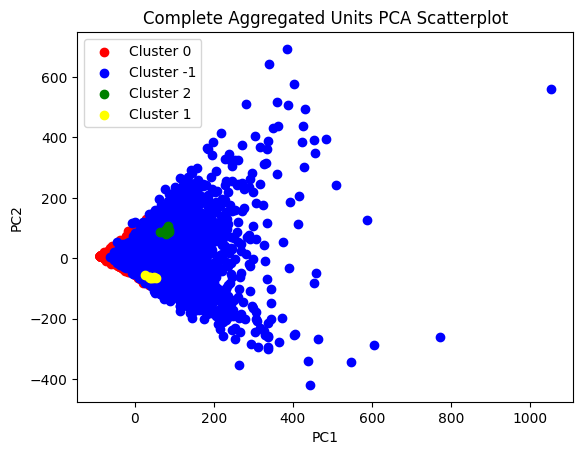

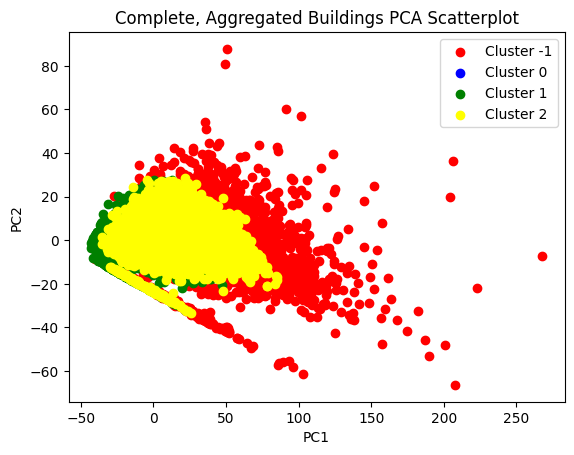

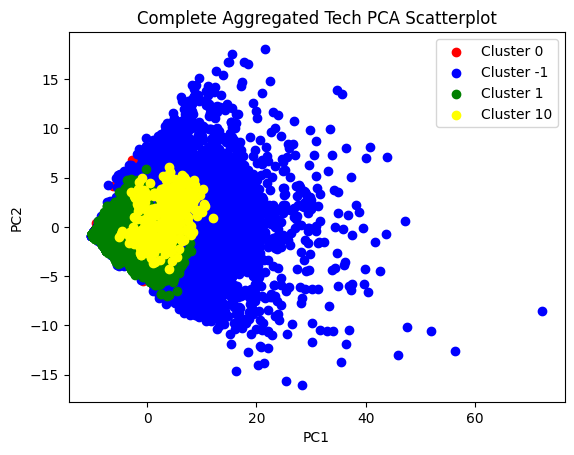

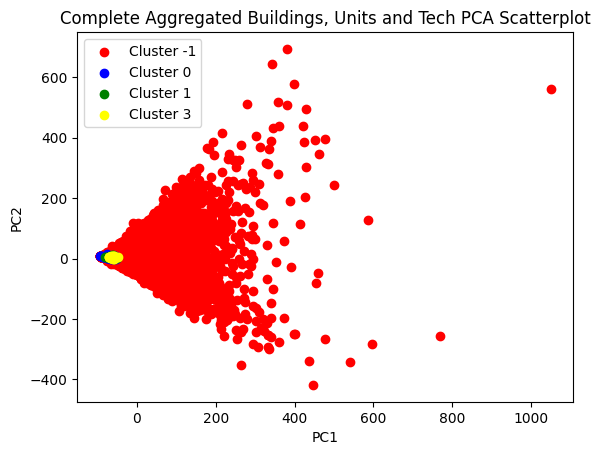

In [8]:
plot_pca_scatterplot(aggregated_unit_clustered_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'cluster'], 'Complete Aggregated Units PCA Scatterplot')
plot_pca_scatterplot(aggregated_building_clustered_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building', 'cluster'], 'Complete, Aggregated Buildings PCA Scatterplot')
plot_pca_scatterplot(aggregated_tech_clustered_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech', 'cluster'], 'Complete Aggregated Tech PCA Scatterplot')
plot_pca_scatterplot(aggregated_building_unit_tech_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building',
                                                         'Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units','Building Tech', 'Economy Tech',
                                                           'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech',
                                                             'cluster' ], 'Complete Aggregated Buildings, Units and Tech PCA Scatterplot')

In [29]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d_scatterplot(df, columns,  title):

    selected_columns = df[columns]
    # Extract the features and normalize them
    X = selected_columns.drop('cluster', axis=1)

    # Apply PCA to reduce the feature space to 3 dimensions
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Create a new dataframe with the PCA results
    df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

    # Add the 'cluster' column back to the dataframe
    df_pca['cluster'] = selected_columns['cluster']

    # Get unique cluster values
    clusters = df_pca['cluster'].unique()

    # Set up colors for each cluster
    colors = ['red', 'blue', 'green', 'yellow']  # Customize colors as desired

    # Create the 3D scatterplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for cluster, color in zip(clusters, colors):
        cluster_data = df_pca[df_pca['cluster'] == cluster]
        ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], c=color, label=f'Cluster {cluster}')

    # Set plot labels
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    # Set plot title
    ax.set_title(title)

    # Show the legend
    ax.legend()

    # Show the plot

    filename = title.replace(' ', '_').lower()
    save_path = 'C:/Users/jakob/Desktop/Code Seminar Strategy Mining/plots/DBSCAN/' + filename + '.png'
    plt.savefig(save_path)



    plt.show()

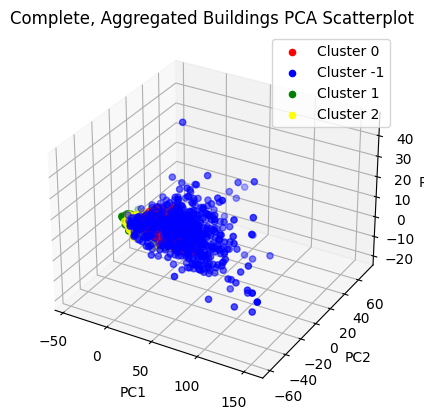

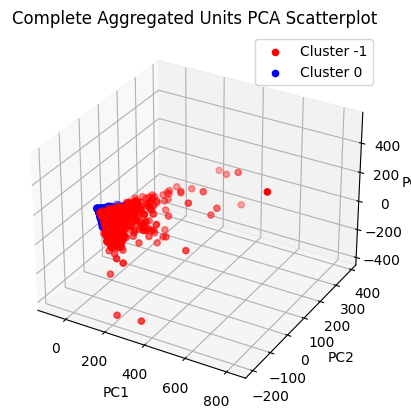

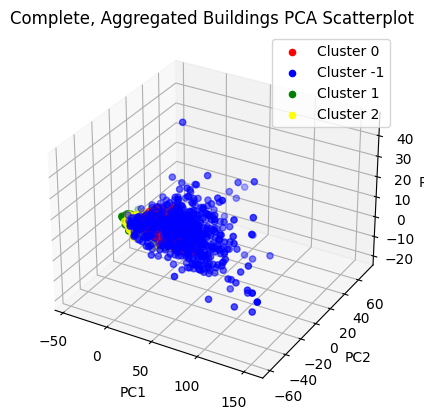

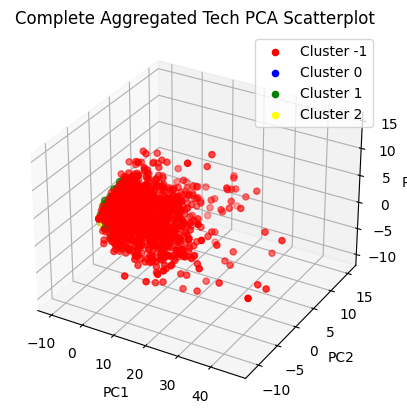

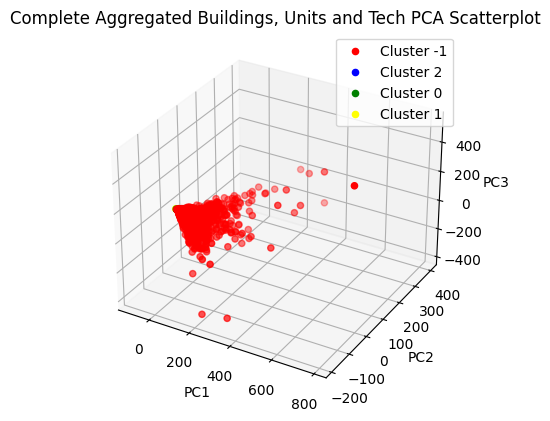

In [31]:
plot_3d_scatterplot(aggregated_unit_clustered_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'cluster'], 'Complete Aggregated Units PCA Scatterplot')
plot_3d_scatterplot(aggregated_building_clustered_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building', 'cluster'], 'Complete, Aggregated Buildings PCA Scatterplot')
plot_3d_scatterplot(aggregated_tech_clustered_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech', 'cluster'], 'Complete Aggregated Tech PCA Scatterplot')
plot_3d_scatterplot(aggregated_building_unit_tech_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building',
                                                         'Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units','Building Tech', 'Economy Tech',
                                                           'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech',
                                                             'cluster' ], 'Complete Aggregated Buildings, Units and Tech PCA Scatterplot')

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_function(df_to_visualize, columns, title):

    selected_columns = df_to_visualize[columns]

    tsne = TSNE(n_components=2, random_state=42)
    X = selected_columns.select_dtypes(include=[np.number])

    X_tsne = tsne.fit_transform(X)
    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

    cluster_labels = df_to_visualize['cluster']
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(title)
    #filename = title.replace(' ', '_').lower()
    #save_path = 'C:/Users/jakob/Desktop/Code Seminar Strategy Mining/plots/DBSCAN/' + filename + '.png'
    #plt.savefig(save_path)
    
    plt.show()


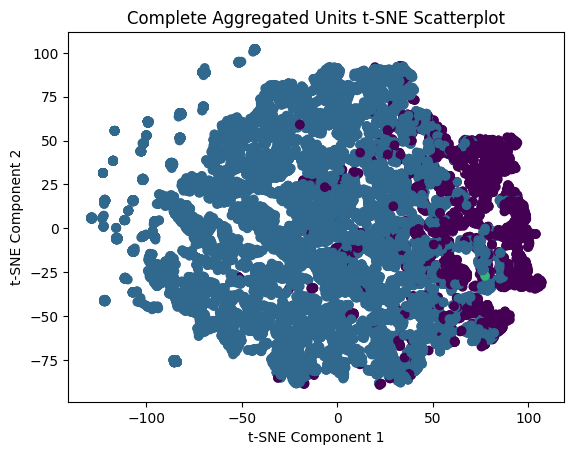

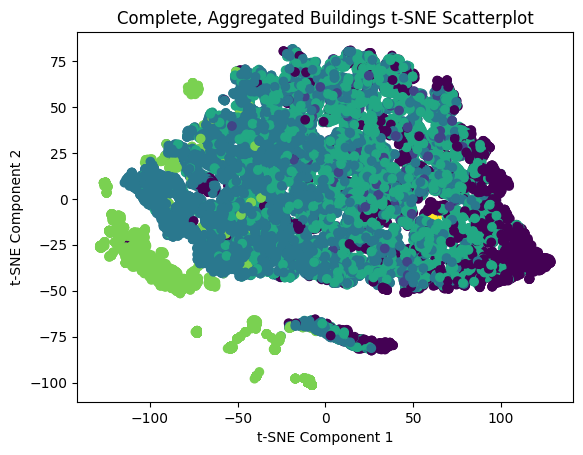

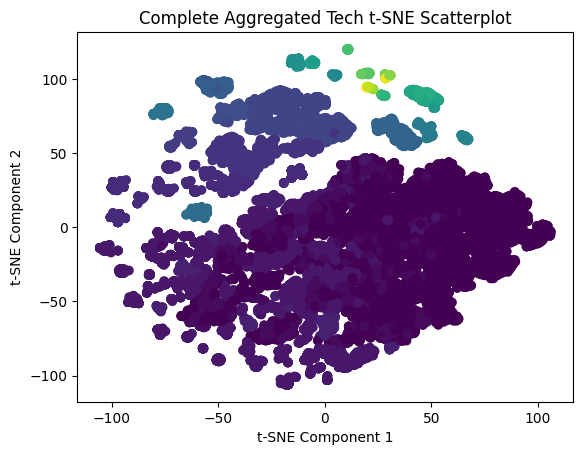

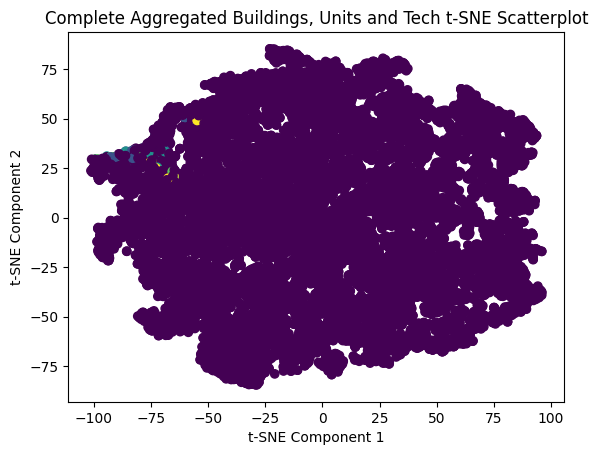

In [12]:
tsne_function(aggregated_unit_clustered_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'cluster'], 'Complete Aggregated Units t-SNE Scatterplot')
tsne_function(aggregated_building_clustered_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building', 'cluster'], 'Complete, Aggregated Buildings t-SNE Scatterplot')
tsne_function(aggregated_tech_clustered_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech', 'cluster'], 'Complete Aggregated Tech t-SNE Scatterplot')
tsne_function(aggregated_building_unit_tech_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building',
                                                         'Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units','Building Tech', 'Economy Tech',
                                                           'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech',
                                                             'cluster' ], 'Complete Aggregated Buildings, Units and Tech t-SNE Scatterplot')